# Lab 4: What was that sound?

### Instructions:
- perform a fresh `restart & run all` before submitting the `.ipynb` to [gradescope](https://www.gradescope.com/courses/478298)
- [lab rubric](https://course.ccs.neu.edu/ds2500/admin_syllabus.html?highlight=rubric#weekly-lab-ds-2501)
- work in groups of 2-5
- be collaborative and kind
    - ask questions of others
    - invite questions from others
- each student will submit their own lab file
- please do not share code files 
    - however, unlike HW, you're welcome to look at each other's ungraded work

# Introduction

In this lab, you'll be given about 150 recordings of me saying a few different names (mostly they're pets I've had in my life, [here is Zeke, in all his glory](https://photos.app.goo.gl/6TA1mZh7dTv5cUWn6)).  Your goal is to build a classifier which can distinguish which name I'm saying.

### Notes / hints:
- avoid digging into the `lab_helper.py` file until the final part.  
- be sure that you're comfortable with precisely what `x` and `y` are below
    - they're arrays in sklearn format
    - try playing a few noises
        - see code cell just before Part A
- [intro video](https://northeastern.zoom.us/rec/share/BmqC9mSlPwMVjR5lWFyw4_N-ws6QY9VfrVbCQILWpiKcdh8XnaqkfbP89DqYBUJo.ih5qUmin8uiyGOS5)

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
import pathlib

from lab_helper import get_df_wav, load_wav, get_xy_array

folder = pathlib.Path('.') / 'sound_wav'
df_wav = get_df_wav(folder)

df_wav.head()

,word,idx,file
1,annie,1,sound_wav/annie1.wav
19,annie,2,sound_wav/annie2.wav
24,annie,3,sound_wav/annie3.wav
44,annie,4,sound_wav/annie4.wav
53,annie,5,sound_wav/annie5.wav


In [3]:
from IPython.display import display, Audio

def play(x, rate):
    """ plays a noise via jupyter
    
    credit: Dheeraj (chillamcharla.d@northeastern.edu), thank you!
    
    Args:
        x (np.array): 1d audio signal
        rate (int): sampling rate
    """
    if x.ndim == 1:
        # mono
        x_tup = x,
    elif x.ndim == 2:
        # stereo
        x_tup = x[:, 0], x[:, 1]
    else:
        raise AttributeError('invalid x.ndim')
        
    # play audio
    display(Audio(x_tup, rate=rate))

In [4]:
# sampling rate of audio (error thrown if not this value)
rate = 44100

# we discard this much audio (seconds) from start of every clip
time_trim_start = .2

# clips are truncated / extended with silence to ensure they're this long (seconds)
time_total = 1.75

x, y, file_list = get_xy_array(df_wav, rate=rate, time_trim_start=time_trim_start, time_total=time_total)

In [5]:
x.shape

(146, 77175)

In [6]:
y 

array(['annie', 'annie', 'annie', 'annie', 'annie', 'annie', 'annie',
       'annie', 'annie', 'annie', 'annie', 'annie', 'annie', 'annie',
       'annie', 'annie', 'annie', 'annie', 'annie', 'annie', 'annie',
       'annie', 'annie', 'annie', 'annie', 'annie', 'annie', 'annie',
       'annie', 'annie', 'annie', 'annie', 'annie', 'fleck', 'fleck',
       'fleck', 'fleck', 'fleck', 'fleck', 'fleck', 'fleck', 'fleck',
       'fleck', 'fleck', 'fleck', 'fleck', 'fleck', 'fleck', 'fleck',
       'fleck', 'fleck', 'fleck', 'fleck', 'fleck', 'fleck', 'fleck',
       'fleck', 'fleck', 'fleck', 'fleck', 'fleck', 'linda', 'linda',
       'linda', 'linda', 'linda', 'linda', 'linda', 'linda', 'linda',
       'linda', 'linda', 'linda', 'linda', 'linda', 'linda', 'linda',
       'linda', 'linda', 'linda', 'linda', 'linda', 'linda', 'linda',
       'linda', 'linda', 'linda', 'linda', 'linda', 'linda', 'matt',
       'matt', 'matt', 'matt', 'matt', 'matt', 'matt', 'matt', 'matt',
       'matt', 'matt

In [7]:
# change the index of the sample below and re-run this cell to hear different noises
play(x=x[-1, :], rate=rate)

# Part A: Classification

Build a k-NN classifier which classifies what the speaker is saying (either 'annie', 'fleck', 'linda', 'matt' or 'zeke').  Produce a complete set of cross validated estimates `y_pred`.

Choose the k of k-NN arbitrarily here, we'll optimize later.

In [8]:
# adjust the parameter to improve the matrix
k = 4

y_true = y

# 5 folds so that 20% of data is used for testing
n_splits = 5

In [9]:
from copy import copy
# initialize classifier
knn_class = KNeighborsClassifier(n_neighbors=k)

# initialize of kfold object
kfold = KFold(n_splits=n_splits, shuffle=True)

# initialize an array of same shape and type as y
y_pred = copy(y)
for train_idx, test_idx in kfold.split(x, y):
    # split into train and test sets
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]
    
    # fit classifier (on training set)
    knn_class.fit(x_train, y_train)
    
    # predict (on testing set)
    y_pred[test_idx] = knn_class.predict(x_test)

In [10]:
# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = KFold(n_splits=n_splits, shuffle = True)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each penguin's species
    y_pred[test_idx] = knn_classifier.predict(x_test)

# Part B: Confusion Matrix

Plot a confusion matrix which shows the performance of our initial classifier.  In a sentence or two, summarize what the confusion matrix shows is happening.  

Our initial classifier, as per usual, may not work too well.  Thanks ok!  Real ML applications work like this:
1. try to build something
1. see if it works
1. if it doesn't work:
    1. find out why
    1. fix it
    1. repeat from step 2 above

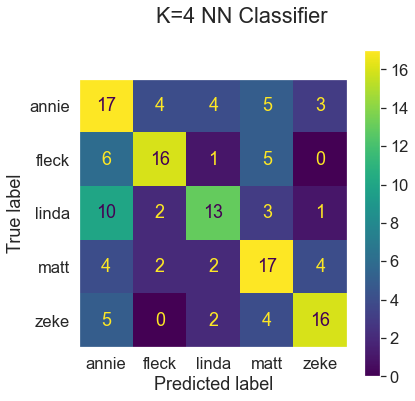

In [11]:
# code to store the original part b before modifying
# from matplotlib.backends.backend_pdf import PdfPages
# f_out = 'original_partB.pdf'

# build and plot confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))

sns.set(font_scale=1.5)
conf_mat_disp.plot()
plt.suptitle('K=4 NN Classifier')
plt.gcf().set_size_inches(6, 6)
plt.grid(False)

# with PdfPages(f_out) as pdf:
#     pdf.savefig(plt.gcf())

# Part C: Tuning up our classifier and data

[part c video](https://northeastern.zoom.us/rec/share/kPUjJd-2-lw1skuqw5Q-4iBHHWQFBSNtOMNvLSHvmlPBkM0-eB_PHp84SJFwtvGe.JH1ylku-jldDQGMq)

The classifier in Part B didn't work too well ... did it?  Usually our ML approaches will not do their best right away, the challenge is to understand why and see what we can do to tune it up.  The plot below shows each noise of every category, with unique samples overlaid in different colors:

<img src="https://i.ibb.co/MC2CrNp/noise-initial.png" width=800>


Examining the initial plots of our data, we see that there's a few problems with the input data.  Fix these problems:
1. The volume differs per sample
    - This is not appropriate.  Implicitly, just because one noise is louder or queiter shouldn't make it more or less likely to be a particular word.
    - How can we make the volume the same for all samples?  
        - Hint: see scale normalization notes
2. Noises, even from a single class, all start at different times!
    - Due to inconsistencies in my ability to record, the noise "Fleck" starts a bit earlier or later in the recording (notice that different samples of "Fleck" are shifted left / right from each other in the image below)
    - This is not appropriate. Ideally the first utterance of the "F" noise should occur at the same index in each recording
    - Is there some way we can "chop-off" the beggining of each noise, up to the point where it first begins?  
        - Doing so would "align" our noises so we don't have this shifted behavior below.
        - I found [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) helpful, other approachs work too
<img src="https://i.ibb.co/0VynmD4/fleck-detail-no-time-align.png" width=400>

Hint for these first two issues: I'd suggest modifying the function `load_wav()` in `lab_helper.py`.  You can submit this alongside the lab to show your work.

3. There's a few parameters we can tune to make sure our classifier is best:
    - the "k" of k nearest neighbors
        - hint: see day13 ica2 for an example
    - the total length of time each sample runs for
    
To see if you've made progress in resolving the problems above, rebuild a cross validated confusion matrix and see if your performance improves.  (Hint: if you resolve the first two problems above the classifier performs reasonably well)